<font size='10'>Universal Sentence Encoder embadding 

## Refrance:

https://towardsdatascience.com/use-cases-of-googles-universal-sentence-encoder-in-production-dd5aaab4fc15

https://tfhub.dev/s?module-type=text-embedding

<font size='8' color='red'> +PLus Theory

<b>The encoder takes as input a lowercased PTB tokenized string (input English strings) and outputs a 512 dimensional vector as the sentence embedding. </b>

<p>
present models for encoding sentences into embedding vectors that specifically target transfer learning to other NLP tasks. The models are efficient and result in accurate performance on diverse transfer tasks. <br>
With transfer learn- ing via sentence embeddings, we observe surprisingly good performance with min- imal amounts of supervised training data for a transfer task .<br>
We obtain encouraging results on Word Embedding Associ-ation Tests (WEAT) targeted at detecting model bias. <br>
Given the high cost of annotating supervised training data, very large training sets are usually not available for most research or industry NLP tasks. Many models address the problem by implicitly per- forming limited transfer learning through the use of pre-trained word embeddings such as those produced by word2vec (Mikolov et al., 2013) or GloVe (Pennington et al., 2014). However, recent work has demonstrated strong transfer task per- formance using pre-trained sentence level embed- dings (Conneau et al., 2017). 
</p>
<p>
They used two new models for encoding sentences into embedding vectors :<br>
1. used transformer architecture ,(Vaswani et al., 2017)<br>
2. other is formulated as a deep averaging network (DAN).(Iyyer et al., 2015)  <br>
</p>

## Transformer architecture:
Transfer Learning differs from traditional Machine Learning in that it is the use of pre-trained models that have been used for another task to jump start the development process on a new task or problem.
<p>This sub-graph uses at- tention to compute context aware representations of words in a sentence that take into account both the ordering and identity of all the other words.<br>
The encoder takes as input a lowercased PTB tokenized string and outputs a 512 dimensional vector as the sentence embedding.
</p>






<b>Refrence:</b>
1. (Vaswani et al., 2017)
2. (Henderson et al., 2017)
3. (Hochreiter and Schmidhu- ber, 1997) 



## Deep Averaging Network (DAN):
<p> input embeddings for words and bi-grams are first averaged together and then passed through a feedforward deep neural network (DNN) to produce sentence embeddings.</p>
<p>the DAN encoder takes as input a lowercased PTB tokenized string and outputs a 512 dimensional sentence embed- ding.</p>
<p>The primary advantage of the DAN encoder is that compute time is linear in the length of the input sequence. DANs achieve strong base- line performance on text classification tasks.</p>

##  the data used for the transfer learning experiments and the Word Embedding Association Test 

- MR : Movie review snippet sentiment on a five star scale (Pang and Lee, 2005). 
- CR : Sentiment of sentences mined from customer reviews (Hu and Liu, 2004). 
- SUBJ : Subjectivity of sentences from movie reviews and plot summaries (Pang and Lee, 2004). 
- MPQA : Phrase level opinion polarity from news data (Wiebe et al., 2005). 
- TREC : Fine grained question classification sourced from TREC (Li and Roth, 2002). 
- SST : Binary phrase level sentiment classification (Socher et al., 2013). 
- STS Benchmark : Semantic textual similarity (STS) between sentence pairs scored by Pear- son correlation with human judgments (Cer et al., 2017). 
- WEAT : Word pairs from the psychology literature on implicit association tests (IAT) that are used to characterize model bias (Caliskan et al., 2017). 


# Coding 

## Summary

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import seaborn as sns

def First_Universal_Sentence_Encoder_embading(df):
    """
    it is fist function that I write for this, secound editition is faster
    The models take as input English strings and produce as output a fixed 512 dimensional embedding representation of the string. 
    -------------------------------------------------
    input: 
         dataframe of text
    -------------------------------------------------
    output: 
        embadding lsit of string in 512 dimensional
    -------------------------------------------------
    https://tfhub.dev/google/universal-sentence-encoder-large/3?tf-hub-format=compressed
    !curl -L "https://tfhub.dev/google/universal-sentence-encoder-large/3?tf-hub-format=compressed" | tar -zxvC sentence_wise_email/module/module_useT
    """
    
    embed = hub.Module("/Users/apple/Documents/Programming/python/Project/sentence_wise_email/module/module_useT")
    embeddings = embed(df)
    with tf.Session() as session:
        session.run([tf.global_variables_initializer(), tf.tables_initializer()])
        new_data = session.run(embeddings)
    return new_data

def embed_useT(module):
    with tf.Graph().as_default():
        sentences = tf.placeholder(tf.string)
        embed = hub.Module(module)
        embeddings = embed(sentences)
        session = tf.train.MonitoredSession()
    return lambda x: session.run(embeddings, {sentences: x})
def Universal_Sentence_Encoder_embadding(df):
    """
    The encoder takes as input a lowercased PTB tokenized string and outputs a 512 dimensional vector as the sentence embedding. 
    -------------------------------------------------
    input: 
        dataframe of text
    -------------------------------------------------
    output: 
        embadding lsit of string in 512 dimensional
    -------------------------------------------------
    https://tfhub.dev/google/universal-sentence-encoder-large/3?tf-hub-format=compressed
    !curl -L "https://tfhub.dev/google/universal-sentence-encoder-large/3?tf-hub-format=compressed" | tar -zxvC sentence_wise_email/module/module_useT
    """
    
    embed_fn = embed_useT('sentence_wise_email/module/module_useT')
    data = embed_fn(df)
    return data
def nnlm_en_dim128_with_normalization(df):
    
    """
    The encoder takes as input a lowercased PTB tokenized string and outputs a 128 dimensional vector as the sentence embedding. 
    -------------------------------------------------
    input: 
        dataframe of text
    -------------------------------------------------
    output: 
        embadding lsit of string in 128 dimensional
    -------------------------------------------------
    https://tfhub.dev/google/nnlm-id-dim128-with-normalization/1?tf-hub-format=compressed
    !curl -L "https://tfhub.dev/google/nnlm-id-dim128-with-normalization/1?tf-hub-format=compressed" | tar -zxvC sentence_wise_email/module/module_useT2
    """
    
    
    embed_fn = embed_useT('sentence_wise_email/module/module_useT2')
    data = embed_fn(df)
    return data
def nnlm_en_dim50_with_normalization(df):
    """
    The encoder takes as input a lowercased PTB tokenized string and outputs a 50 dimensional vector as the sentence embedding. 
    -------------------------------------------------
    input: 
         dataframe of text
    -------------------------------------------------
    output: 
        embadding lsit of string in 50 dimensional
    -------------------------------------------------
    https://tfhub.dev/google/nnlm-en-dim50-with-normalization/1
    """
    
    embed_fn = embed_useT('')
    data = embed_fn(df)
    return data

In [ ]:
def redundant_sent_idx(sim_matrix):
    """
    It takes similarity matrix (generated from sentence encoder) as input and gives index of redundant statements
    
    """
    dup_idx = [] 
    for i in range(sim_matrix.shape[0]):
        if i not in dup_idx:
            tmp = [t+i+1 for t in list(np.where( sim_matrix[i][i+1:] > 0.8 )[0])]
            dup_idx.extend(tmp)
    return dup_idx
#indexes of duplicate statements.

def unique_messages_for_similarity_visualization(encoding_matrix):
    """
    indexes of duplicate statements.
    """
    dup_indexes  = redundant_sent_idx(np.inner(encoding_matrix,encoding_matrix))
    unique_messages = np.delete(np.array(messages), dup_indexes)
    
    return unique_messages
def plot_similarity(labels, features, rotation):
    
    """
    plot_similarity(messages, encoding_matrix, 90)
    """
    
    
    corr = np.inner(features, features)
    sns.set(font_scale=1.2)
    g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlGnBu")
    g.set_xticklabels(labels, rotation=rotation)
    g.set_title("Semantic Textual Similarity")

plot_similarity(messages, encoding_matrix, 90)

In [5]:
import tensorflow as tf
import tensorflow_hub as hub

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [14]:
import numpy as np

module_useT2 ----> news

module_useT  ----> universal

In [ ]:
#download the model to local so it can be used again and again

In [5]:
#!mkdir sentence_wise_email/module/module_useT

In [9]:
# Download the module, and uncompress it to the destination folder. 
!curl -L "https://tfhub.dev/google/universal-sentence-encoder-large/3?tf-hub-format=compressed" | tar -zxvC sentence_wise_email/module/module_useT

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
x ./
x ./tfhub_module.pb
x ./variables/
 99  745M   99  743M    0     0  3546k      0  0:03:35  0:03:34  0:00:01 3507k
x ./variables/variables.index
x ./assets/
100  745M  100  745M    0     0  3550k      0  0:03:35  0:03:35 --:--:-- 3685k



In [13]:
embed = hub.Module("sentence_wise_email/module/module_useT")

# Compute a representation for each message, showing various lengths supported.
word = "Elephant"
sentence = "I am a sentence for which I would like to get its embedding."
paragraph = (
    "Universal Sentence Encoder embeddings also support short paragraphs. "
    "There is no hard limit on how long the paragraph is. Roughly, the longer "
    "the more 'diluted' the embedding will be.")

messages = [word, sentence, paragraph]

# Reduce logging output.
tf.logging.set_verbosity(tf.logging.ERROR)

with tf.Session() as session:
    session.run([tf.global_variables_initializer(), tf.tables_initializer()])
    message_embeddings = session.run(embed(messages))
        
for i, message_embedding in enumerate(np.array(message_embeddings).tolist()):
    print("Message: {}".format(messages[i]))
    print("Embedding size: {}".format(len(message_embedding))) 
    message_embedding_snippet = ", ".join((str(x) for x in        message_embedding[:3]))
    print("Embedding[{},...]\n".format(message_embedding_snippet))

Message: Elephant
Embedding size: 512
Embedding[0.04498474299907684, -0.05743394419550896, 0.002211471786722541,...]

Message: I am a sentence for which I would like to get its embedding.
Embedding size: 512
Embedding[0.05568016692996025, -0.009607920423150063, 0.006246279925107956,...]

Message: Universal Sentence Encoder embeddings also support short paragraphs. There is no hard limit on how long the paragraph is. Roughly, the longer the more 'diluted' the embedding will be.
Embedding size: 512
Embedding[0.03874938562512398, 0.0765201598405838, -0.0007945825927890837,...]



In [ ]:


embed = hub.Module("https://tfhub.dev/google/universal-sentence-encoder/2")
embeddings = embed([
"The quick brown fox jumps over the lazy dog.",
"I am a sentence for which I would like to get its embedding"])


with tf.Session() as session:
    session.run([tf.global_variables_initializer(), tf.tables_initializer()])
    print(session.run(embeddings))

In [1]:
!mkdir sentence_wise_email/module/module_useT2

In [3]:
!curl -L "https://tfhub.dev/google/nnlm-id-dim128-with-normalization/1?tf-hub-format=compressed" | tar -zxvC sentence_wise_email/module/module_useT2

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0x assets/
  0  401M    0 2126k    0     0  1485k      0  0:04:36  0:00:01  0:04:35 2365k
x saved_model.pb
x tfhub_module.pb
x variables/
x variables/variables.index
100  401M  100  401M    0     0  1892k      0  0:03:37  0:03:37 --:--:-- 3409k



In [6]:
with tf.Session() as session:
    session.run([tf.global_variables_initializer(), tf.tables_initializer()])

embed = hub.Module("sentence_wise_email/module/module_useT2")
embeddings = embed(["kucing", "kucing dan anjing"])
with tf.Session() as session:
    session.run([tf.global_variables_initializer(), tf.tables_initializer()])
    print(session.run(embeddings))

INFO:tensorflow:Saver not created because there are no variables in the graph to restore
[[-9.17550623e-02  1.98048800e-02  2.03363691e-02 -6.77533150e-02
  -6.60339147e-02  1.13052772e-02 -9.90561675e-03 -7.46383294e-02
   1.09684899e-01 -6.94854185e-02  7.92946965e-02 -1.00808389e-01
   1.33106455e-01 -2.89725531e-02 -1.21929288e-01 -4.78923209e-02
   2.51515415e-02 -1.45736225e-02  1.14273503e-01 -1.31929129e-01
   1.30299732e-01  1.17414799e-02 -8.76725465e-02  2.76321806e-02
   8.48763958e-02  9.58619341e-02 -3.39910015e-02  7.42413104e-02
   1.41477942e-01  5.54507039e-02  2.07513978e-04 -5.49393259e-02
   5.92960604e-02 -4.64704260e-02  7.93719813e-02 -1.02927998e-01
  -1.87704861e-02 -7.48659670e-02  8.18240345e-02  7.20073506e-02
   1.73921064e-01  5.90694919e-02 -1.95656042e-03 -8.55402276e-02
   8.67313147e-02 -1.28781483e-01  1.96813256e-01 -1.77905127e-01
   7.05166459e-02  1.50533393e-01 -3.98268066e-02 -1.18108280e-01
  -9.62451994e-02  1.28963590e-01 -1.25406206e-01  8.

In [9]:
#Function so that one session can be called multiple times. 
#Useful while multiple calls need to be done for embedding. 
import tensorflow as tf
import tensorflow_hub as hub

def embed_useT(module):
    with tf.Graph().as_default():
        sentences = tf.placeholder(tf.string)
        embed = hub.Module(module)
        embeddings = embed(sentences)
        session = tf.train.MonitoredSession()
    return lambda x: session.run(embeddings, {sentences: x})

embed_fn = embed_useT('sentence_wise_email/module/module_useT2')
messages = [
    "we are sorry for the inconvenience",
    "we are sorry for the delay",
    "we regret for your inconvenience",
    "we don't deliver to baner region in pune",
    "we will get you the best possible rate"
]
data = embed_fn(messages)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [12]:
print(len(data))
print(len(data[0]))

5
128


# Find Similarty:

https://github.com/sambit9238/Deep-Learning/blob/master/tensorflow_hub_useT.ipynb

In [17]:
encoding_matrix = data

#It takes similarity matrix (generated from sentence encoder) as input and gives index of redundant statements
def redundant_sent_idx(sim_matrix):
    """
    It takes similarity matrix (generated from sentence encoder) as input and gives index of redundant statements
    
    """
    dup_idx = [] 
    for i in range(sim_matrix.shape[0]):
        if i not in dup_idx:
            tmp = [t+i+1 for t in list(np.where( sim_matrix[i][i+1:] > 0.8 )[0])]
            dup_idx.extend(tmp)
    return dup_idx
#indexes of duplicate statements.

def unique_messages_for_similarity_visualization(encoding_matrix):
    """
    indexes of duplicate statements.
    """
    dup_indexes  = redundant_sent_idx(np.inner(encoding_matrix,encoding_matrix))
    unique_messages = np.delete(np.array(messages), dup_indexes)
    
    return unique_messages
def plot_similarity(labels, features, rotation):
    
    """
    plot_similarity(messages, encoding_matrix, 90)
    """
    
    
    corr = np.inner(features, features)
    sns.set(font_scale=1.2)
    g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlGnBu")
    g.set_xticklabels(labels, rotation=rotation)
    g.set_title("Semantic Textual Similarity")

plot_similarity(messages, encoding_matrix, 90)

In [23]:
#encoding_matrix
unique_messages

array(['we are sorry for the inconvenience'], dtype='<U40')

In [19]:
np.inner(encoding_matrix,encoding_matrix)

array([[2.4195127, 2.2291534, 1.9311321, 1.2090695, 2.1309268],
       [2.2291534, 2.2334814, 1.7915511, 1.2269642, 2.1166344],
       [1.9311321, 1.7915511, 1.961492 , 1.1338664, 1.8944802],
       [1.2090695, 1.2269642, 1.1338664, 1.593376 , 1.4737406],
       [2.1309268, 2.1166344, 1.8944802, 1.4737406, 3.1485028]],
      dtype=float32)

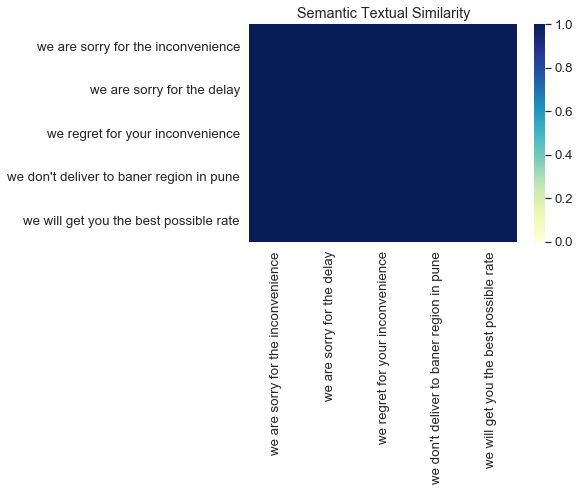

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
def plot_similarity(labels, features, rotation):
    corr = np.inner(features, features)
    sns.set(font_scale=1.2)
    g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlGnBu")
    g.set_xticklabels(labels, rotation=rotation)
    g.set_title("Semantic Textual Similarity")

plot_similarity(messages, encoding_matrix, 90)

In [ ]:
embed = hub.Module("https://tfhub.dev/google/nnlm-en-dim50-with-normalization/1")
embeddings = embed(["cat is on the mat", "dog is in the fog"])
